<a href="https://colab.research.google.com/github/chetansolanke14/Tensorflow_DL/blob/master/Classification_Diabetes_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
ls

pima-indians-diabetes.csv  sample_data/


In [0]:
diabetes = pd.read_csv('pima-indians-diabetes.csv')

In [8]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [0]:
#cols = ['PregnanciesNumber','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Class']

In [10]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [11]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [0]:
cols_to_norm =['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree']

In [0]:
diabetes[cols_to_norm]= diabetes[cols_to_norm].apply(lambda x:(x-x.min())/(x.max()-x.min() ))

In [14]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [0]:
#Create feature columns:
num_pregnant =tf.feature_column.numeric_column('Number_pregnant')
plasma_gluc =tf.feature_column.numeric_column('Glucose_concentration')
dias_press =tf.feature_column.numeric_column('Blood_pressure')
triceps = tf.feature_column.numeric_column('Triceps')
insulin =tf.feature_column.numeric_column('Insulin')
bmi =tf.feature_column.numeric_column('BMI')
diabetes_pedigree =tf.feature_column.numeric_column('Pedigree')
age =tf.feature_column.numeric_column('Age')

In [0]:
#Converting non continuous values: vocabulary and hash function

In [0]:
assigned_group =tf.feature_column.categorical_column_with_vocabulary_list('Group',['A','B','C','D'])

In [0]:
#assigned_group = tf.feature_column.categorical_column_with_hash_bucket('Group',hash_bucket_size=10)

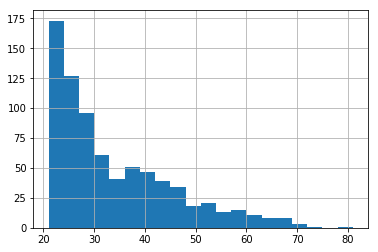

In [19]:
diabetes['Age'].hist(bins=20)

In [0]:
age_bucket =tf.feature_column.bucketized_column(age, boundaries=[20,30,40,50,60,70,80])

In [21]:
age_bucket

BucketizedColumn(source_column=NumericColumn(key='Age', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), boundaries=(20, 30, 40, 50, 60, 70, 80))

In [0]:
feat_cols =[num_pregnant,plasma_gluc,dias_press,insulin,bmi,diabetes_pedigree,age_bucket]

In [0]:
x_data= diabetes.drop('Class',axis=1)

In [24]:
x_data.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,C


In [0]:
labels =diabetes['Class']

In [26]:
labels.head()

0    1
1    0
2    1
3    0
4    1
Name: Class, dtype: int64

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test=train_test_split(x_data,labels, test_size=0.3, random_state=101)

In [0]:
input_func = tf.estimator.inputs.pandas_input_fn(x= X_train,y=y_train, batch_size=10,num_epochs=1000,shuffle=True)

In [30]:
model =tf.estimator.LinearClassifier(feature_columns=feat_cols, n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp6ekyw6a8', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fc097921550>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [31]:
model.train(input_fn=input_func, steps=1000)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmp6ekyw6a8/model.ckpt.
INFO:tensorflow:loss = 6.931472, step = 0
INFO:tensorflow:global_step/sec: 149.286
INFO:tensorflow:loss = 6.4731507, step = 100 (0.676 sec)
INFO:tensorflow:global_step/sec: 182.236
INFO:tensorflow:loss = 4.7711506, step = 200 (0.547 sec)
INFO:tensorflow:global_step/sec: 

In [0]:
eval_input =tf.estimator.inputs.pandas_input_fn(x=X_test, y=y_test,batch_size=10,num_epochs=1,shuffle=False)

In [33]:
result =model.evaluate(eval_input)

INFO:tensorflow:Calling model_fn.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-05-19T20:24:02Z
INFO:tensorflow:Graph was finalized.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from /tmp/tmp6ekyw6a8/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-05-19-20:24:02
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.72727275, accuracy_baseline = 0.64935064, auc = 0.8017696, auc_precision_recall = 0.6562332, average_loss = 0.52551144, global_step = 1000, label/mean = 0.35064936, loss = 5.058048, precision = 0.6216216, prediction/mean = 0.37587664, recall = 0.56790125
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: /tmp/tmp6ekyw6a8/model.ckpt-1000


In [34]:
result

{'accuracy': 0.72727275,
 'accuracy_baseline': 0.64935064,
 'auc': 0.8017696,
 'auc_precision_recall': 0.6562332,
 'average_loss': 0.52551144,
 'global_step': 1000,
 'label/mean': 0.35064936,
 'loss': 5.058048,
 'precision': 0.6216216,
 'prediction/mean': 0.37587664,
 'recall': 0.56790125}

In [0]:
pred_input_func =tf.estimator.inputs.pandas_input_fn(x=X_test,batch_size=10,num_epochs=1,shuffle=False)

In [0]:
predictions =model.predict(pred_input_func)

In [37]:
my_pred= list(predictions)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp6ekyw6a8/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [38]:
my_pred

[{'class_ids': array([1]),
  'classes': array([b'1'], dtype=object),
  'logistic': array([0.5170297], dtype=float32),
  'logits': array([0.06814516], dtype=float32),
  'probabilities': array([0.4829703, 0.5170297], dtype=float32)},
 {'class_ids': array([1]),
  'classes': array([b'1'], dtype=object),
  'logistic': array([0.659313], dtype=float32),
  'logits': array([0.66023433], dtype=float32),
  'probabilities': array([0.34068695, 0.659313  ], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'logistic': array([0.39382213], dtype=float32),
  'logits': array([-0.43127418], dtype=float32),
  'probabilities': array([0.6061779, 0.3938221], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'logistic': array([0.31564176], dtype=float32),
  'logits': array([-0.7738736], dtype=float32),
  'probabilities': array([0.68435824, 0.31564176], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array([b'0'], dtype=object

In [39]:
dnn_model =tf.estimator.DNNClassifier(hidden_units=[10,10,10],feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp2v4tpswk', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fc096fb92b0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [0]:
embedded_group_col = tf.feature_column.embedding_column(assigned_group, dimension=4)

In [0]:
feat_cols =[num_pregnant,plasma_gluc,dias_press,insulin,bmi,diabetes_pedigree,embedded_group_col,age_bucket]

In [0]:
input_func =tf.estimator.inputs.pandas_input_fn(X_train,y_train,batch_size=10, num_epochs=1000, shuffle=True)

In [46]:
dnn_model =tf.estimator.DNNClassifier(hidden_units=[10,10,10],feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpbfd_aje8', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fc0962e7198>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [47]:
dnn_model.train(input_fn=input_func, steps=1000)

INFO:tensorflow:Calling model_fn.
Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.
Instructions for updating:
Use tf.cast instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpbfd_aje8/model.ckpt.
INFO:tensorflow:loss = 6.845274, step = 0
INFO:tensorflow:global_step/sec: 146.012
INFO:tensorflow:loss = 5.0133595, step = 100 (0.688 sec)
INFO:tensorflow:global_step/sec: 195.396
INFO:tensorflow:loss = 5.436498, step = 200 (0.509 sec)
INFO:tensorflow:global_step/sec: 189.926
INFO:tensorflow:loss = 5.155434, step = 300 (0.530 sec)
INFO:tensorflow:global_step/sec: 195.329
INFO:tensorflow:loss = 4.6035633, step = 400 (0.508 sec)
INFO:tensorflow:global_step/sec: 191.115
INFO:tensorflow:loss = 3.6787586, step = 50

In [0]:
eval_input_func =tf.estimator.inputs.pandas_input_fn(x=X_test,y=y_test, batch_size=10, num_epochs=1, shuffle=False)

In [51]:
dnn_model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-05-19T20:33:43Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpbfd_aje8/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-05-19-20:33:43
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.7835498, accuracy_baseline = 0.64935064, auc = 0.82798356, auc_precision_recall = 0.64662814, average_loss = 0.4957812, global_step = 1000, label/mean = 0.35064936, loss = 4.771894, precision = 0.6703297, prediction/mean = 0.40417132, recall = 0.75308645
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: /tmp/tmpbfd_aje8/model.ckpt-1000


{'accuracy': 0.7835498,
 'accuracy_baseline': 0.64935064,
 'auc': 0.82798356,
 'auc_precision_recall': 0.64662814,
 'average_loss': 0.4957812,
 'global_step': 1000,
 'label/mean': 0.35064936,
 'loss': 4.771894,
 'precision': 0.6703297,
 'prediction/mean': 0.40417132,
 'recall': 0.75308645}

In [48]:
result =dnn_model.evaluate(eval_input)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-05-19T20:30:04Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpbfd_aje8/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-05-19-20:30:04
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.7835498, accuracy_baseline = 0.64935064, auc = 0.82798356, auc_precision_recall = 0.64662814, average_loss = 0.4957812, global_step = 1000, label/mean = 0.35064936, loss = 4.771894, precision = 0.6703297, prediction/mean = 0.40417132, recall = 0.75308645
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: /tmp/tmpbfd_aje8/model.ckpt-1000


In [49]:
result

{'accuracy': 0.7835498,
 'accuracy_baseline': 0.64935064,
 'auc': 0.82798356,
 'auc_precision_recall': 0.64662814,
 'average_loss': 0.4957812,
 'global_step': 1000,
 'label/mean': 0.35064936,
 'loss': 4.771894,
 'precision': 0.6703297,
 'prediction/mean': 0.40417132,
 'recall': 0.75308645}

In [0]:
pred_input_func =tf.estimator.inputs.pandas_input_fn(x=X_test,batch_size=10,num_epochs=1,shuffle=False)

In [0]:
predictions =dnn_model.predict(pred_input_func)

In [54]:
my_pred= list(predictions)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpbfd_aje8/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [55]:
my_pred

[{'class_ids': array([1]),
  'classes': array([b'1'], dtype=object),
  'logistic': array([0.54020315], dtype=float32),
  'logits': array([0.16116056], dtype=float32),
  'probabilities': array([0.45979685, 0.54020315], dtype=float32)},
 {'class_ids': array([1]),
  'classes': array([b'1'], dtype=object),
  'logistic': array([0.8409754], dtype=float32),
  'logits': array([1.6655036], dtype=float32),
  'probabilities': array([0.15902458, 0.8409754 ], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'logistic': array([0.3405496], dtype=float32),
  'logits': array([-0.6608461], dtype=float32),
  'probabilities': array([0.6594505 , 0.34054956], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'logistic': array([0.49725246], dtype=float32),
  'logits': array([-0.01099023], dtype=float32),
  'probabilities': array([0.50274754, 0.49725243], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array([b'0'], dtype=ob